In [1]:
import bz2
import os
import numpy as np
from urllib.request import urlopen

In [4]:
from model import create_model

nn4_small2 = create_model()

W0930 00:58:31.783807 21608 deprecation_wrapper.py:119] From C:\Users\GREAM\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0930 00:58:32.583807 21608 deprecation_wrapper.py:119] From C:\Users\GREAM\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4074: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



In [5]:
nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('weights/nn4.small2.v1.h5')

In [10]:
import numpy as np
import os.path
import pickle
class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in sorted(os.listdir(path)):
        for f in sorted(os.listdir(os.path.join(path, i))):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('images')

In [11]:

def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

In [13]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

In [43]:
inputPath = 'C:/Users/GREAM/Documents/VSCode Workspace/face-recognition-CNN/kang129.jpg' #Данные на вход, должны братся с вебки
img = load_image(inputPath) 
img = align_image(img)
# scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
# obtain embedding vector for image

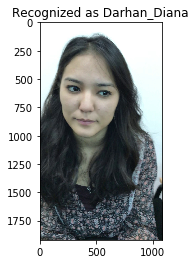

In [44]:
from sklearn.preprocessing import LabelEncoder
targets = np.array([m.name for m in metadata])
encoder = LabelEncoder()
encoder.fit(targets)
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 834

example_image = load_image(inputPath)
example_prediction = loaded_model.predict(nn4_small2_pretrained.predict(np.expand_dims(img, axis=0)))
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Recognized as {example_identity}');